<a href="https://colab.research.google.com/github/hammaad2002/Solar-Irradiance-Forecasting/blob/main/rnn_model_for_solar_irradiance_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!git clone https://github.com/hammaad2002/Solar-Irradiance-Forecasting.git
!pip install torchmetrics

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from torchmetrics import MeanAbsoluteError, MeanAbsolutePercentageError
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
# Assuming your DataFrame is named 'df'
desired_starting_row = 3
df = pd.read_csv('/kaggle/working/Solar-Irradiance-Forecasting/Solar Irradiance Dataset/2017Solar.csv', skiprows=desired_starting_row - 1)
df

,Year,Month,Day,Hour,Minute,GHI,Temperature,Dew Point,Relative Humidity,Pressure,Wind Direction,Wind Speed,Precipitable Water
0,2017,1,1,0,0,0,10.6,-17.4,12.29,949,103,0.7,0.7
1,2017,1,1,0,15,0,10.5,-17.4,12.37,949,107,0.7,0.7
2,2017,1,1,0,30,0,10.4,-17.4,12.45,949,111,0.7,0.7
3,2017,1,1,0,45,0,10.2,-17.3,12.74,949,115,0.7,0.7
4,2017,1,1,1,0,0,10.1,-17.3,12.83,949,120,0.7,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2017,12,31,22,45,0,11.2,-17.4,11.78,950,81,0.8,0.7
35036,2017,12,31,23,0,0,11.1,-17.4,11.86,950,85,0.8,0.7
35037,2017,12,31,23,15,0,11.0,-17.4,11.93,949,89,0.7,0.7
35038,2017,12,31,23,30,0,10.9,-17.4,12.01,949,94,0.7,0.7


In [ ]:
workingDf = df.drop(['Year', 'Month', 'Day', 'Hour', 'Minute'], axis = 1)
workingDf

,GHI,Temperature,Dew Point,Relative Humidity,Pressure,Wind Direction,Wind Speed,Precipitable Water
0,0,10.6,-17.4,12.29,949,103,0.7,0.7
1,0,10.5,-17.4,12.37,949,107,0.7,0.7
2,0,10.4,-17.4,12.45,949,111,0.7,0.7
3,0,10.2,-17.3,12.74,949,115,0.7,0.7
4,0,10.1,-17.3,12.83,949,120,0.7,0.7
...,...,...,...,...,...,...,...,...
35035,0,11.2,-17.4,11.78,950,81,0.8,0.7
35036,0,11.1,-17.4,11.86,950,85,0.8,0.7
35037,0,11.0,-17.4,11.93,949,89,0.7,0.7
35038,0,10.9,-17.4,12.01,949,94,0.7,0.7


In [ ]:
columns = workingDf.columns.tolist()
columns[0], columns[-1] = columns[-1], columns[0]
workingDf = workingDf[columns]
workingDf

,Precipitable Water,Temperature,Dew Point,Relative Humidity,Pressure,Wind Direction,Wind Speed,GHI
0,0.7,10.6,-17.4,12.29,949,103,0.7,0
1,0.7,10.5,-17.4,12.37,949,107,0.7,0
2,0.7,10.4,-17.4,12.45,949,111,0.7,0
3,0.7,10.2,-17.3,12.74,949,115,0.7,0
4,0.7,10.1,-17.3,12.83,949,120,0.7,0
...,...,...,...,...,...,...,...,...
35035,0.7,11.2,-17.4,11.78,950,81,0.8,0
35036,0.7,11.1,-17.4,11.86,950,85,0.8,0
35037,0.7,11.0,-17.4,11.93,949,89,0.7,0
35038,0.7,10.9,-17.4,12.01,949,94,0.7,0


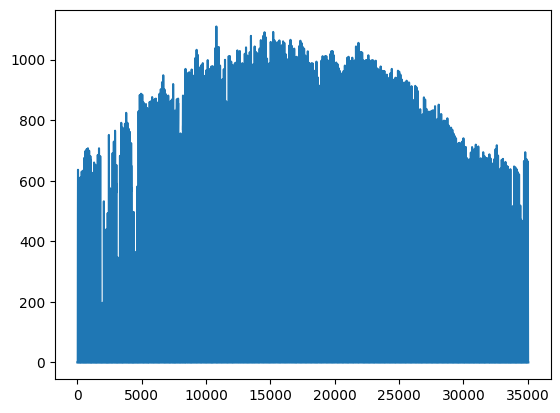

In [ ]:
target = workingDf['GHI']
target.plot()
plt.show()

In [ ]:
random_day = random.randint(1, 365)
random_day

345

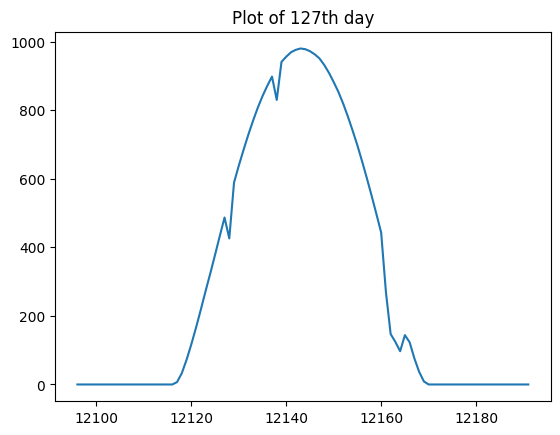

In [ ]:
random_day = random.randint(4, 365) # starting from 4th day so that I can write "th" in the title :)
target = workingDf['GHI'][(random_day-1)*96:(random_day*96)]
target.plot()
plt.title(str(f"Plot of {random_day}th day"))
plt.show()

In [ ]:
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(workingDf), columns=workingDf.columns)
df_normalized.head(10) # this normalizes the data in between range [0, 1]

,Precipitable Water,Temperature,Dew Point,Relative Humidity,Pressure,Wind Direction,Wind Speed,GHI
0,0.166667,0.291743,0.236287,0.122209,0.633333,0.286111,0.043860,0.0
1,0.166667,0.289908,0.236287,0.123159,0.633333,0.297222,0.043860,0.0
2,0.166667,0.288073,0.236287,0.124109,0.633333,0.308333,0.043860,0.0
3,0.166667,0.284404,0.238397,0.127553,0.633333,0.319444,0.043860,0.0
4,0.166667,0.282569,0.238397,0.128622,0.633333,0.333333,0.043860,0.0
5,0.166667,0.280734,0.238397,0.129572,0.633333,0.344444,0.035088,0.0
6,0.166667,0.278899,0.238397,0.130641,0.633333,0.355556,0.035088,0.0
7,0.166667,0.277064,0.240506,0.132660,0.633333,0.366667,0.035088,0.0
8,0.166667,0.275229,0.240506,0.133729,0.633333,0.377778,0.035088,0.0
9,0.166667,0.273394,0.240506,0.134679,0.633333,0.394444,0.035088,0.0


In [ ]:
class simpleRNN(nn.Module):
    def __init__(self, features = 8, prediction = 1, window = 288, horizon = 1):
        super(simpleRNN, self).__init__()

        self.layer1 = nn.RNN(input_size = 8, hidden_size = 128, 
                             num_layers = 1, bias = True, 
                             batch_first = True, dropout = 0.2)
        
        self.activation1 = nn.Tanh()
        
        self.layer2 = nn.RNN(input_size = 128, hidden_size = 64,
                             num_layers = 1, bias = True,
                             batch_first = True, dropout = 0.2)

        self.activation2 = nn.Tanh()
        
        self.layer3 = nn.RNN(input_size = 64, hidden_size = 32,
                             num_layers = 1, bias = True,
                             batch_first = True, dropout = 0.2)
        
        self.activation3 = nn.Tanh()
        
        self.layer4 = nn.Linear(in_features = 32, out_features = 1)
       
        self.activation4 = nn.GELU()
        
        self.drop = nn.Dropout(p=0.5)

        self.layer5 = nn.Linear(in_features = window, out_features = horizon)

        self.activation5 = nn.GELU()

    def forward(self, x):

        x = self.layer1(x)
        x = self.activation1(x[0])
        x = self.layer2(x)
        x = self.activation2(x[0])
        x = self.layer3(x)
        x = self.activation3(x[0])
        x = self.layer4(x)
        x = self.activation4(x)
        x = self.drop(x)
        x = x.transpose(1, 2)
        x = self.layer5(x)
        x = self.activation5(x)
        return x

In [ ]:
per_day_readings = 4 * 24
window_length = 3 * per_day_readings    # we want our model to look back at the data of 3 days
horizon = 1                             # and then predict the next 15 minute reading

In [ ]:
df = df_normalized.values
stride = 1
x = []
y = []
for i in tqdm(range(0, len(df) - window_length, stride)):
    x.append(df[i:window_length+i, : ]) #GHI included but its past values only
    y.append(df[window_length+i,-1])                  #next GHI value

  0%|          | 0/34752 [00:00<?, ?it/s]

In [ ]:
x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(34752, 288, 8)
(34752,)


In [ ]:
x[45]

array([[0.36111111, 0.55779817, 0.50843882, ..., 0.71388889, 0.09649123,
        0.56176736],
       [0.36111111, 0.56330275, 0.50632911, ..., 0.73888889, 0.11403509,
        0.56988278],
       [0.36111111, 0.56697248, 0.50632911, ..., 0.76111111, 0.12280702,
        0.57348963],
       ...,
       [0.33333333, 0.46238532, 0.66666667, ..., 0.45277778, 0.13157895,
        0.50405771],
       [0.33333333, 0.46788991, 0.66666667, ..., 0.66944444, 0.13157895,
        0.52569883],
       [0.33333333, 0.47522936, 0.66666667, ..., 0.88888889, 0.14035088,
        0.54102795]])

In [ ]:
y[44]

0.5410279531109107

In [ ]:
# splitting our dataset into two parts one will be training set and the other will be testing set
# Lets store last 5 days as our test set
x_train = x[:-per_day_readings*5]
y_train = y[:-per_day_readings*5]
x_test  = x[len(y) - per_day_readings*5:]
y_test  = y[len(y) - per_day_readings*5:]
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(34272, 288, 8)
(34272,)
(480, 288, 8)
(480,)


In [ ]:
# finding the device of our environment
device = 'cpu' if not torch.cuda.is_available() else 'cuda'

In [ ]:
# converting our dataset to pytorch tensors for forwarding passing
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)

In [ ]:
amp = True # If we want the model to be trained faster

In [ ]:
# Now we towards training the model
if amp:
    use_amp = True
    scaler = torch.cuda.amp.GradScaler(enabled=use_amp)

In [ ]:
set_epochs = 50

In [ ]:
# initializing the model first before training
features = 8
prediction = 1

modelRNN = simpleRNN(features = features, prediction = prediction, 
                  window = window_length, horizon = horizon)

modelRNN = modelRNN.to(device)

In [ ]:
modelRNN

simpleRNN(
  (layer1): RNN(8, 128, batch_first=True, dropout=0.2)
  (activation1): Tanh()
  (layer2): RNN(128, 64, batch_first=True, dropout=0.2)
  (activation2): Tanh()
  (layer3): RNN(64, 32, batch_first=True, dropout=0.2)
  (activation3): Tanh()
  (layer4): Linear(in_features=32, out_features=1, bias=True)
  (activation4): GELU(approximate='none')
  (drop): Dropout(p=0.5, inplace=False)
  (layer5): Linear(in_features=288, out_features=1, bias=True)
  (activation5): GELU(approximate='none')
)

In [ ]:
# Lets define loss function and optimizer
criterion = MeanAbsoluteError().to(device)                         # MAE
metricc = MeanAbsolutePercentageError().to(device)                 # MAPE metric
optimizer = optim.AdamW(modelRNN.parameters(), lr=1e-4, weight_decay= 1e-5)               # Adam  TRY THIS : , 

num_epochs = set_epochs
batch_size = 128

loss_info_RNN = []
metric_info_RNN = []

for epoch in tqdm(range(num_epochs)):

    running_loss = 0.0                                             # MAE Loss
    running_metric = 0.0                                           # MAPE metric
    
    for i in tqdm(range(0, len(x_train_tensor), batch_size), desc=f"Epoch {epoch+1}"):

        # Get batch of inputs and targets
        batch_x = x_train_tensor[i:i+batch_size]
        batch_y = y_train_tensor[i:i+batch_size]
        
        # Reshape input tensor
        batch_x = batch_x.view(-1, window_length, features)
        
        if amp:

            with torch.autocast(device_type= 'cuda', dtype=torch.float16, enabled=use_amp):
                # Forward pass
                outputs = modelRNN(batch_x)
                
                if batch_size == 1:
                    loss = criterion(outputs.view(-1), torch.tensor([batch_y]))
                    metric = metricc(outputs.view(-1), torch.tensor([batch_y]))

                else:
                    loss = criterion(outputs.view(-1), batch_y)
                    metric = metricc(outputs.view(-1), batch_y)
            
            # Backward pass and optimization
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update() 

        else:       

            # Forward pass
            outputs = modelRNN(batch_x)

            if batch_size == 1:
                loss = criterion(outputs.view(-1), torch.tensor([batch_y]))
                metric = metricc(outputs.view(-1), torch.tensor([batch_y]))

            else:
                loss = criterion(outputs.view(-1), batch_y)
                metric = metricc(outputs.view(-1), batch_y)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

        # Zero the parameter gradients
        optimizer.zero_grad(set_to_none=True)

        running_loss += loss.item()
        running_metric += metric.item()

    # Calculate epoch loss and metric
    epoch_loss = running_loss / (len(x_train) / batch_size)
    epoch_metric = running_metric / (len(x_train) / batch_size)
    loss_info_RNN.append(epoch_loss)
    metric_info_RNN.append(epoch_metric)
    print("-"*25, f"Epoch {epoch + 1}","-"*25)
    print(f"Epoch {epoch+1} MAE loss: {epoch_loss:.9f}")
    print(f"Epoch {epoch+1} MAPE metric: {epoch_metric:.9f}")

print("Training complete!")

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 1 -------------------------
Epoch 1 MAE loss: 0.124316485
Epoch 1 MAPE metric: 24436.102492560


Epoch 2:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 2 -------------------------
Epoch 2 MAE loss: 0.083997705
Epoch 2 MAPE metric: 18911.427761730


Epoch 3:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 3 -------------------------
Epoch 3 MAE loss: 0.072489661
Epoch 3 MAPE metric: 15093.826168228


Epoch 4:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 4 -------------------------
Epoch 4 MAE loss: 0.067659461
Epoch 4 MAPE metric: 12978.085691308


Epoch 5:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 5 -------------------------
Epoch 5 MAE loss: 0.063751648
Epoch 5 MAPE metric: 11361.066203825


Epoch 6:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 6 -------------------------
Epoch 6 MAE loss: 0.060315409
Epoch 6 MAPE metric: 10089.028624861


Epoch 7:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 7 -------------------------
Epoch 7 MAE loss: 0.057762971
Epoch 7 MAPE metric: 8998.500789639


Epoch 8:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 8 -------------------------
Epoch 8 MAE loss: 0.055684665
Epoch 8 MAPE metric: 8147.643312143


Epoch 9:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 9 -------------------------
Epoch 9 MAE loss: 0.053986251
Epoch 9 MAPE metric: 7647.292892157


Epoch 10:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 10 -------------------------
Epoch 10 MAE loss: 0.053106430
Epoch 10 MAPE metric: 7200.603542068


Epoch 11:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 11 -------------------------
Epoch 11 MAE loss: 0.051582981
Epoch 11 MAPE metric: 6609.422041864


Epoch 12:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 12 -------------------------
Epoch 12 MAE loss: 0.050440991
Epoch 12 MAPE metric: 6169.017197895


Epoch 13:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 13 -------------------------
Epoch 13 MAE loss: 0.049128382
Epoch 13 MAPE metric: 5658.434572136


Epoch 14:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 14 -------------------------
Epoch 14 MAE loss: 0.048357947
Epoch 14 MAPE metric: 5171.221220129


Epoch 15:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 15 -------------------------
Epoch 15 MAE loss: 0.047297690
Epoch 15 MAPE metric: 4835.404199766


Epoch 16:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 16 -------------------------
Epoch 16 MAE loss: 0.045887543
Epoch 16 MAPE metric: 4420.904563127


Epoch 17:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 17 -------------------------
Epoch 17 MAE loss: 0.045192229
Epoch 17 MAPE metric: 4076.134577789


Epoch 18:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 18 -------------------------
Epoch 18 MAE loss: 0.044615765
Epoch 18 MAPE metric: 4116.720314688


Epoch 19:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 19 -------------------------
Epoch 19 MAE loss: 0.044620667
Epoch 19 MAPE metric: 4096.948394006


Epoch 20:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 20 -------------------------
Epoch 20 MAE loss: 0.044538742
Epoch 20 MAPE metric: 4115.234301142


Epoch 21:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 21 -------------------------
Epoch 21 MAE loss: 0.043595036
Epoch 21 MAPE metric: 4031.707370904


Epoch 22:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 22 -------------------------
Epoch 22 MAE loss: 0.043501455
Epoch 22 MAPE metric: 4084.826631890


Epoch 23:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 23 -------------------------
Epoch 23 MAE loss: 0.043354391
Epoch 23 MAPE metric: 4039.616001674


Epoch 24:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 24 -------------------------
Epoch 24 MAE loss: 0.043565375
Epoch 24 MAPE metric: 4174.325386795


Epoch 25:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 25 -------------------------
Epoch 25 MAE loss: 0.042882311
Epoch 25 MAPE metric: 4102.069075612


Epoch 26:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 26 -------------------------
Epoch 26 MAE loss: 0.042943494
Epoch 26 MAPE metric: 4149.583937416


Epoch 27:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 27 -------------------------
Epoch 27 MAE loss: 0.043087047
Epoch 27 MAPE metric: 4243.414993015


Epoch 28:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 28 -------------------------
Epoch 28 MAE loss: 0.042945384
Epoch 28 MAPE metric: 4109.370765950


Epoch 29:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 29 -------------------------
Epoch 29 MAE loss: 0.042606484
Epoch 29 MAPE metric: 4280.728746316


Epoch 30:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 30 -------------------------
Epoch 30 MAE loss: 0.042269829
Epoch 30 MAPE metric: 4278.794079350


Epoch 31:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 31 -------------------------
Epoch 31 MAE loss: 0.042266370
Epoch 31 MAPE metric: 4229.302139866


Epoch 32:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 32 -------------------------
Epoch 32 MAE loss: 0.042525777
Epoch 32 MAPE metric: 4360.669150473


Epoch 33:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 33 -------------------------
Epoch 33 MAE loss: 0.042277683
Epoch 33 MAPE metric: 4290.577435206


Epoch 34:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 34 -------------------------
Epoch 34 MAE loss: 0.041608208
Epoch 34 MAPE metric: 4342.395911750


Epoch 35:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 35 -------------------------
Epoch 35 MAE loss: 0.042006056
Epoch 35 MAPE metric: 4421.497967546


Epoch 36:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 36 -------------------------
Epoch 36 MAE loss: 0.041665887
Epoch 36 MAPE metric: 4411.871556044


Epoch 37:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 37 -------------------------
Epoch 37 MAE loss: 0.041388373
Epoch 37 MAPE metric: 4425.465135077


Epoch 38:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 38 -------------------------
Epoch 38 MAE loss: 0.041485903
Epoch 38 MAPE metric: 4437.659808390


Epoch 39:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 39 -------------------------
Epoch 39 MAE loss: 0.041612772
Epoch 39 MAPE metric: 4488.495533891


Epoch 40:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 40 -------------------------
Epoch 40 MAE loss: 0.041555419
Epoch 40 MAPE metric: 4547.405175417


Epoch 41:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 41 -------------------------
Epoch 41 MAE loss: 0.041303258
Epoch 41 MAPE metric: 4561.354624858


Epoch 42:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 42 -------------------------
Epoch 42 MAE loss: 0.040792060
Epoch 42 MAPE metric: 4597.999927054


Epoch 43:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 43 -------------------------
Epoch 43 MAE loss: 0.041970802
Epoch 43 MAPE metric: 4858.935404631


Epoch 44:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 44 -------------------------
Epoch 44 MAE loss: 0.040547934
Epoch 44 MAPE metric: 4678.827146614


Epoch 45:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 45 -------------------------
Epoch 45 MAE loss: 0.041043878
Epoch 45 MAPE metric: 4828.935431073


Epoch 46:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 46 -------------------------
Epoch 46 MAE loss: 0.040556408
Epoch 46 MAPE metric: 4716.936694860


Epoch 47:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 47 -------------------------
Epoch 47 MAE loss: 0.040779434
Epoch 47 MAPE metric: 4731.547737585


Epoch 48:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 48 -------------------------
Epoch 48 MAE loss: 0.041057594
Epoch 48 MAPE metric: 4831.195086368


Epoch 49:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 49 -------------------------
Epoch 49 MAE loss: 0.040686772
Epoch 49 MAPE metric: 4800.413799895


Epoch 50:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 50 -------------------------
Epoch 50 MAE loss: 0.040894447
Epoch 50 MAPE metric: 4870.414960190
Training complete!


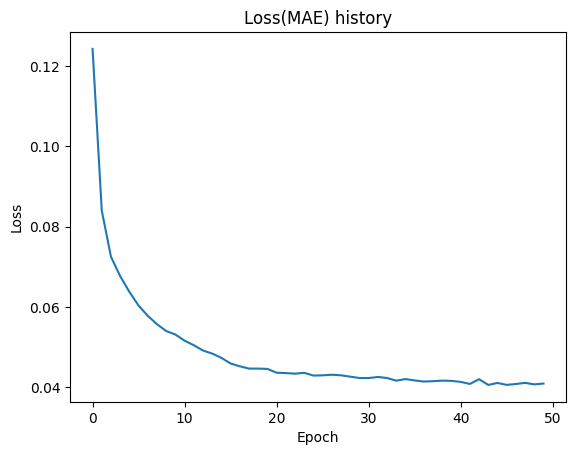

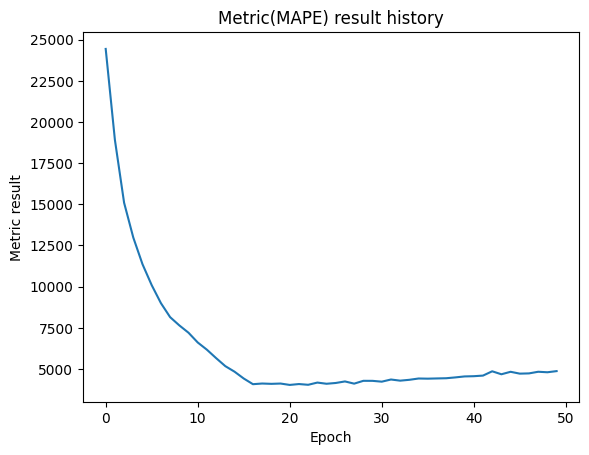

In [ ]:
# Plot the history of loss
plt.plot(range(num_epochs), loss_info_RNN)
plt.title('Loss(MAE) history')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot the history of metric result
plt.plot(range(num_epochs), metric_info_RNN)
plt.title('Metric(MAPE) result history')
plt.xlabel('Epoch')
plt.ylabel('Metric result')
plt.show()

In [ ]:
# Testing model's performance on our dataset
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

In [ ]:
running_loss = 0.0                                             # MAE Loss
running_metric = 0.0                                           # MAPE metric

batch_size = 1
modPred_RNN = []
GroundTruth = []
for i in tqdm(range(0, len(x_test_tensor), batch_size), desc=f"Train set inference ..."):
  
        # Get batch of inputs and targets
        batch_x = x_test_tensor[i:i+batch_size]
        batch_y = y_test_tensor[i:i+batch_size]
        
        # Reshape input tensor
        batch_x = batch_x.view(-1, window_length, features)

        # Forward pass
        with torch.inference_mode():
            modelRNN.eval()
            outputs = modelRNN(batch_x)

        if batch_size == 1:
            loss = criterion(outputs.view(-1).to(outputs.device), batch_y.to(outputs.device))
            metric = metricc(outputs.view(-1).to(outputs.device), batch_y.to(outputs.device))
            if outputs.view(-1).cpu().detach() < 0:
                modPred_RNN.append(0)
            else: 
                modPred_RNN.append(outputs.view(-1).cpu().detach())
            GroundTruth.append(torch.tensor([batch_y]).cpu().detach())
        
        else:
            loss = criterion(outputs.view(-1), batch_y)
            metric = metricc(outputs.view(-1), batch_y)
            if outputs.view(-1).cpu().detach() < 0:
                modPred_RNN.append(0)
            else: 
                modPred_RNN.append(outputs.view(-1).cpu().detach())
            GroundTruth.append(batch_y.cpu().detach())
          
        running_loss += loss.item()
        running_metric += metric.item()

test_loss = running_loss / (len(x_train) / batch_size)
test_metric = running_metric / (len(x_train) / batch_size)
print("-"*25, "TEST LOSS", "-"*25)
print(f"Test MAE loss: {test_loss:.9f}")
print(f"Test MAPE metric: {test_metric:.9f}")

Train set inference ...:   0%|          | 0/480 [00:00<?, ?it/s]

------------------------- TEST LOSS -------------------------
Test MAE loss: 0.000463908
Test MAPE metric: 51.428896057


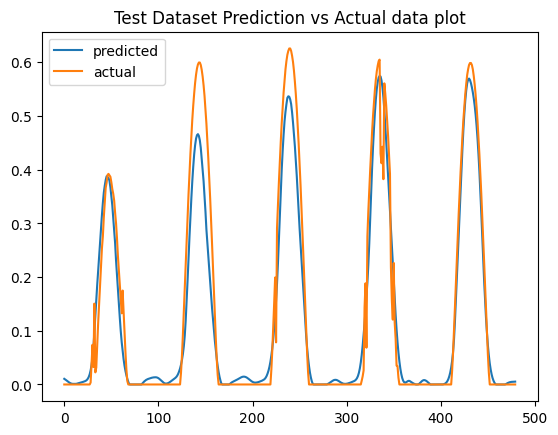

In [ ]:
plt.plot(modPred_RNN)
plt.plot(GroundTruth)
plt.title('Test Dataset Prediction vs Actual data plot')
plt.legend(['predicted', 'actual'])
plt.show()